# CS412 - Machine Learning - 2021
## Homework 3
100 pts


## Goal

The goal of this homework is two-fold:

*   Introduction to the Transfer Learning
*   Gain experience with three dimensional input data (colored images), and pretrained models

## Dataset
[**CelebA**](https://www.cs.toronto.edu/~kriz/cifar.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google drive. In your Google drive, you need to have CelebA10k.zip and CelebA10kGender.txt uploaded. (Do not change the name of these files.) Reserve 20% of the training data for validation** and **use the rest for development (learning your models). The official test data (2000 samples) should only be used for testing at the end, and not model selection.**

## Task 
Build a classifier with the Keras library function calls and pretrained models to classify gender in the CelebA dataset.

## Software: 

Keras is a library that we will use especially for deep learning, but also with basic neural network functionality of course.

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

https://keras.io/api/

https://keras.io/api/applications/

When you search for Conv2d for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name hw3-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the #share link on top right). 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
% matplotlib inline

In [ ]:
#This will take around 2 to 4 minutes, depends on the internet
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/cs412-hw/hw3/CelebA10k.zip', 'r') as zip_ref: # enter the file path on your drive
  zip_ref.extractall()
  zip_ref.close()

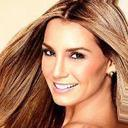

In [ ]:
from IPython.display import Image
Image('/content/CelebA10k/000001.jpg')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cs412-hw/hw3/CelebA10klabels.csv") # enter the file path on your drive
print(data.shape)
data.head()

(10000, 2)


,5_o_Clock_Shadow,Male
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
data.loc[data['Male'] == -1, 'Male'] = 0

In [ ]:
data.head()

,5_o_Clock_Shadow,Male
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
### DO NOT CHANGE THE CODE HERE SO AS TO NOT GET ERRORS
# parameters
ImgSz = 64

# Read training images from text file

labels = []
images = []
for j in range(data.shape[0]):
    labels.append(data["Male"][j])
    #Reading Image
    im = image.load_img("/content/CelebA10k/"+ data["5_o_Clock_Shadow"][j])  
    im = im.resize((ImgSz, ImgSz))
    x = image.img_to_array(im) 
    #x = x.reshape((1,) + x.shape) 
    x = np.array(x, dtype="float") / 255.0
    images.append(x)
 
    
lbls = np.array(labels)
imgs = np.array(images)

x_train = imgs[0:8000]
y_train = lbls[0:8000]
x_test = imgs[8000:]
y_test = lbls[8000:]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 64, 64, 3), (8000,), (2000, 64, 64, 3), (2000,))

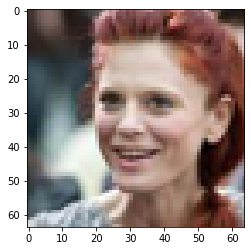

In [ ]:
plt.imshow(x_train[1])

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as its memory usage, distribution of labels, etc.


In [ ]:
# plot random 5 images in your dataset with their labels
from random import randint

#x = [randint(0, 10000) for p in range(0, 5)]
#x
#results : [2673, 2739, 6759, 7090, 9819]

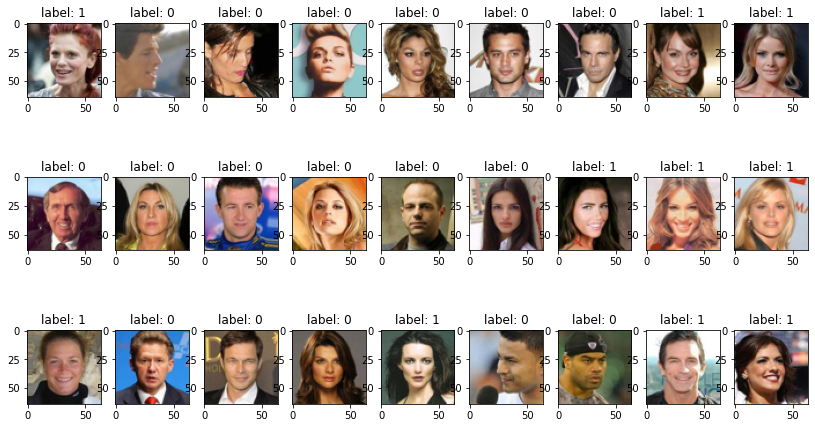

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,8))

results= [1,2,3,4,5,6,7,8,9,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38]

x = 1
for i in results:

  plt.subplot(3,9,x)
  plt.title("label: " + str(lbls[i]))
  plt.imshow(imgs[i])
  x = x+1


plt.show()



Label 0 refers women whereas label 1 refers man. Obviously there are some mistakes in dataset..

In [ ]:
data.shape

(10000, 2)

In [ ]:
data.head()

,5_o_Clock_Shadow,Male
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
data["Male"].describe()

count    10000.000000
mean         0.452300
std          0.497744
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Male, dtype: float64

In [ ]:
data.memory_usage()

Index                 128
5_o_Clock_Shadow    80000
Male                80000
dtype: int64

In [ ]:
data["Male"].value_counts()

0    5477
1    4523
Name: Male, dtype: int64

##4) Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
# Split 80-20

from sklearn.model_selection import train_test_split
x_train, x_var, y_train, y_var = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_var.shape, y_var.shape)

(6400, 64, 64, 3) (6400,)
(1600, 64, 64, 3) (1600,)


## 5) Train Model with Transfer Learning
* Import a pretrained model from keras. By freezing some of its layer weights and/or adding more layers to its output train the model on the dataset. Metaparameters of the model are to be set to default or your own choice. 

* Train two more models by adding at most 5 hidden layers into a pretrained model of your choice. Choose the best model among all the models you trained so far by reporting their performance, together with their runtimes, number parameters, etc.



In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model

In [ ]:
# Pretrained model

VGGmodel = tf.keras.applications.VGG16(include_top = False, weights = "imagenet", input_shape = (ImgSz,ImgSz,3)) # pretrained weigths on imagenet dataset
VGGmodel.summary() # Print the network

# Remove last two layers (one hidden layer + Output layer)
VGGmodel.layers.pop()
VGGmodel.layers.pop()

# Freeze the layers except the last 2 layers
for layer in VGGmodel.layers[:-2]:
    layer.trainable = False

# Check the status of the layers 
for layer in VGGmodel.layers:
    print(layer, layer.trainable)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Model 1
from keras.layers import Dense, Dropout, Flatten
model = tf.keras.Sequential() # your model that will use the pretrained model's parameters

# Add the vgg convolutional base model
model.add(VGGmodel)

# Add new layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# # Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4096)              8392704   
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 23,111,489
Trainable params: 10,756,609
Non-trainable params: 12,354,880
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

# Train the model using own data
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split = 0.2) 

# Evaluate the model
print("")
score = model.evaluate(x_var, y_var)

Epoch 1/5
160/160 [==============================] - 11s 48ms/step - loss: 0.2504 - accuracy: 0.5609 - val_loss: 0.2364 - val_accuracy: 0.5961
Epoch 2/5
160/160 [==============================] - 7s 46ms/step - loss: 0.2401 - accuracy: 0.5969 - val_loss: 0.2321 - val_accuracy: 0.6141
Epoch 3/5
160/160 [==============================] - 7s 46ms/step - loss: 0.2302 - accuracy: 0.6246 - val_loss: 0.2281 - val_accuracy: 0.6313
Epoch 4/5
160/160 [==============================] - 7s 46ms/step - loss: 0.2247 - accuracy: 0.6367 - val_loss: 0.2236 - val_accuracy: 0.6352
Epoch 5/5
160/160 [==============================] - 7s 46ms/step - loss: 0.2233 - accuracy: 0.6428 - val_loss: 0.2221 - val_accuracy: 0.6469

50/50 [==============================] - 2s 32ms/step - loss: 0.2189 - accuracy: 0.6513


In [ ]:
#####

In [ ]:
# Model 2
from keras.layers import Dense, Dropout, Flatten
model2 = tf.keras.Sequential() # your model that will use the pretrained model's parameters

# Add the vgg convolutional base model
model2.add(VGGmodel)

# Add new layers
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# # Show a summary of the model. Check the number of trainable parameters
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 17,338,177
Trainable params: 4,983,297
N

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model2.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

# Train the model using own data
history = model2.fit(x_train, y_train, batch_size=32, epochs=5, validation_split = 0.2) 

# Evaluate the model
print("")
score = model2.evaluate(x_var, y_var)

Epoch 1/5
160/160 [==============================] - 8s 47ms/step - loss: 0.2353 - accuracy: 0.6117 - val_loss: 0.2170 - val_accuracy: 0.6531
Epoch 2/5
160/160 [==============================] - 7s 45ms/step - loss: 0.2081 - accuracy: 0.6734 - val_loss: 0.2106 - val_accuracy: 0.6781
Epoch 3/5
160/160 [==============================] - 7s 45ms/step - loss: 0.1972 - accuracy: 0.7012 - val_loss: 0.2123 - val_accuracy: 0.6594
Epoch 4/5
160/160 [==============================] - 7s 44ms/step - loss: 0.1885 - accuracy: 0.7141 - val_loss: 0.2001 - val_accuracy: 0.6961
Epoch 5/5
160/160 [==============================] - 7s 45ms/step - loss: 0.1826 - accuracy: 0.7254 - val_loss: 0.2043 - val_accuracy: 0.6898

50/50 [==============================] - 2s 33ms/step - loss: 0.2001 - accuracy: 0.6906


In [ ]:
####

In [ ]:
# Pretrained model 2

VGGmodel = tf.keras.applications.VGG16(include_top = False, weights = "imagenet", input_shape = (ImgSz,ImgSz,3)) # pretrained weigths on imagenet dataset
VGGmodel.summary() # Print the network

# Remove last two layers (Output layer)
VGGmodel.layers.pop()

# Freeze the layers except the last 3 layers
for layer in VGGmodel.layers[:-3]:
    layer.trainable = False

# Check the status of the layers 
for layer in VGGmodel.layers:
    print(layer, layer.trainable)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Model 3
from keras.layers import Dense, Dropout, Flatten
model3 = tf.keras.Sequential() # your model that will use the pretrained model's parameters

# Add the vgg convolutional base model
model3.add(VGGmodel)

# Add new layers
model3.add(Flatten())
model3.add(Dense(4096, activation='relu'))
model3.add(Dense(2048, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

# # Show a summary of the model. Check the number of trainable parameters
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 4096)              8392704   
                                                                 
 dense_6 (Dense)             (None, 2048)              8390656   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 31,500,097
Trainable params: 21,505,025


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model3.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

# Train the model using own data
history = model3.fit(x_train, y_train, batch_size=32, epochs=8, validation_split = 0.2) 

# Evaluate the model
print("")
score = model3.evaluate(x_var, y_var)

Epoch 1/8
160/160 [==============================] - 10s 55ms/step - loss: 0.2299 - accuracy: 0.6299 - val_loss: 0.2111 - val_accuracy: 0.6727
Epoch 2/8
160/160 [==============================] - 9s 54ms/step - loss: 0.2039 - accuracy: 0.6854 - val_loss: 0.2084 - val_accuracy: 0.6852
Epoch 3/8
160/160 [==============================] - 9s 53ms/step - loss: 0.1918 - accuracy: 0.7104 - val_loss: 0.2161 - val_accuracy: 0.6742
Epoch 4/8
160/160 [==============================] - 9s 53ms/step - loss: 0.1800 - accuracy: 0.7309 - val_loss: 0.1918 - val_accuracy: 0.7039
Epoch 5/8
160/160 [==============================] - 9s 53ms/step - loss: 0.1764 - accuracy: 0.7404 - val_loss: 0.1936 - val_accuracy: 0.7039
Epoch 6/8
160/160 [==============================] - 9s 54ms/step - loss: 0.1682 - accuracy: 0.7590 - val_loss: 0.1961 - val_accuracy: 0.7094
Epoch 7/8
160/160 [==============================] - 9s 54ms/step - loss: 0.1577 - accuracy: 0.7730 - val_loss: 0.1925 - val_accuracy: 0.7164
Epoch

## 6) Test your classifier on Test set

- Apply same pre-processing as training data
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [ ]:
# Predict
score = model3.evaluate(x_test, y_test)

63/63 [==============================] - 3s 45ms/step - loss: 0.1832 - accuracy: 0.7320


In [ ]:
model3.predict(x_test)

array([[0.47262788],
       [0.15694763],
       [0.37930274],
       ...,
       [0.6730761 ],
       [0.08339981],
       [0.9628418 ]], dtype=float32)

##7) Report Your Results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what CNN is or what transfer learning is, assuming they are known to people in your research area). 

**Must include statements such as those below:**
**(Remove the text in bullet points, below, and include your own report)**

* Include the **problem definition**: 1-2 lines.

* Talk about your **approach** - the pretrained network and its architecture, changes to the architecture, what is finetuned and for how many epochs...

* Give your **experimental setup** (train/val/test sets, size and how split, samples) and results - along with some analysis of the errors (just take a look at some of your errors and say a few things)

* **Anything else?** You can comment on the speed, computational resources, or anything else that you deem important/interesting. 

* You can add **additional visualization as separate pages **if you want, think of them as appendix, keeping the one-page as abstract/summary.

* Mention **Bonus part** here - in 1-2 paragraphs at most. 
 



##8) (Bonus 5 pts) Train Convolutional neural networks first on development data


* Train a convolutional neural network from scratch (not transfer learning) with number of hidden layers and neurons of **your choice**. Rest of the parameters are to be set to default or your own choice. 

* The aim of this part is to establish an insight for convolutional neural networks and to see why we use them.


In [ ]:
 # Create the model
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# # Show a summary of the model. Check the number of trainable parameters
#model4.summary()

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

# Train the model using own data
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split = 0.2) 

# Evaluate the model
print("")
score = model.evaluate(x_var, y_var)

Epoch 1/5
160/160 [==============================] - 20s 116ms/step - loss: 0.2484 - accuracy: 0.5643 - val_loss: 0.2484 - val_accuracy: 0.5430
Epoch 2/5
160/160 [==============================] - 18s 115ms/step - loss: 0.2468 - accuracy: 0.5645 - val_loss: 0.2481 - val_accuracy: 0.5430
Epoch 3/5
160/160 [==============================] - 18s 115ms/step - loss: 0.2462 - accuracy: 0.5645 - val_loss: 0.2482 - val_accuracy: 0.5430
Epoch 4/5
160/160 [==============================] - 18s 115ms/step - loss: 0.2460 - accuracy: 0.5645 - val_loss: 0.2482 - val_accuracy: 0.5430
Epoch 5/5
160/160 [==============================] - 18s 114ms/step - loss: 0.2459 - accuracy: 0.5645 - val_loss: 0.2483 - val_accuracy: 0.5430

50/50 [==============================] - 2s 33ms/step - loss: 0.2501 - accuracy: 0.5281
